<a href="https://colab.research.google.com/github/payal15604/GAN-Training-/blob/main/gans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Radford and Francois (counterfeit money case)

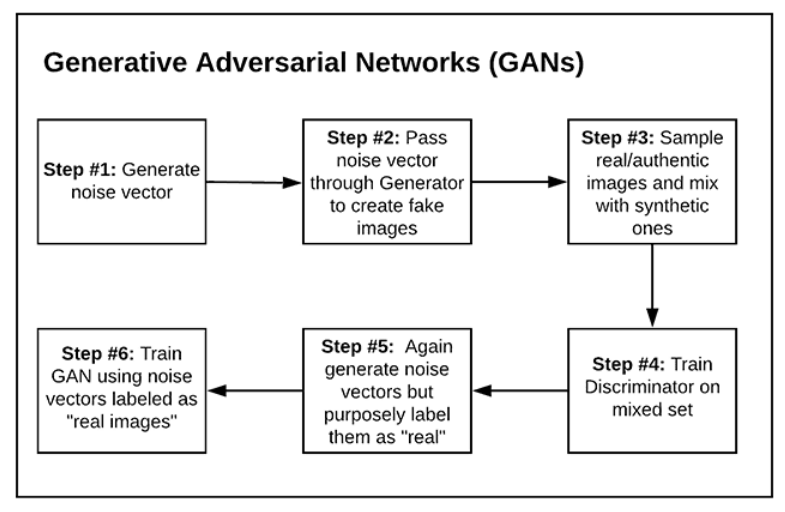

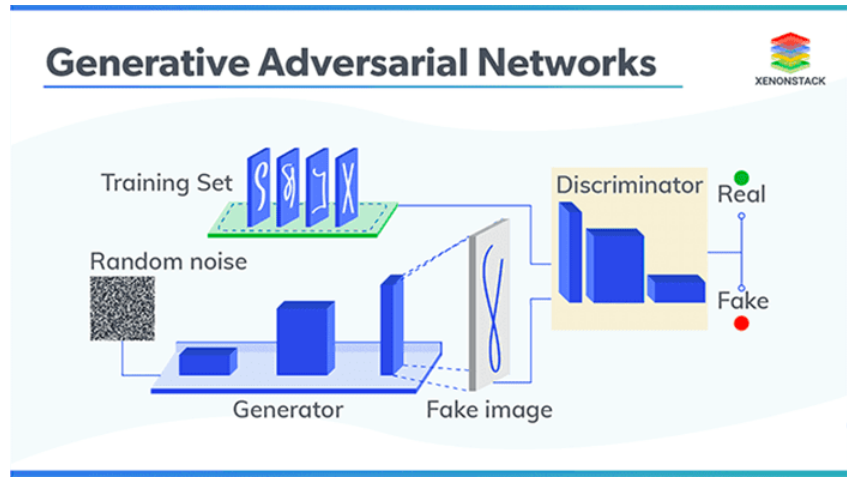

When training GANs, our goal is not to seek a minimum loss value but instead to find some ***equilibrium*** between the two (Chollet 2017)

In their paper, Radford et al. recommend the following architecture guidelines for more stable GANs:

Replace any pooling layers with strided convolutions

Use batch normalization in both the generator and discriminator.

Remove fully-connected layers in deeper networks.

Use ReLU in the generator except for the final layer, which will utilize tanh.

Use Leaky ReLU in the discriminator.




*In his book, Francois Chollet then provides additional recommendations on training GANs:*

Sample random vectors from a normal distribution (i.e., Gaussian distribution) rather than a uniform distribution.


Add dropout to the discriminator.
Add noise to the class labels when training the discriminator.


To reduce checkerboard pixel artifacts in the output image, use a kernel size that is divisible by the stride when utilizing convolution or transposed convolution in both the generator and discriminator.


If your adversarial loss rises dramatically while your discriminator loss falls to zero, try reducing the learning rate of the discriminator and increasing the dropout of the discriminator.

In [ ]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape

**GENERATOR**

In [19]:
class DCGAN:
	@staticmethod
	def build_generator(dim, depth, channels=1, inputDim=100,
		outputDim=512):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (dim, dim, depth)
		chanDim = -1
    # first set of FC => RELU => BN layers
		model.add(Dense(input_dim=inputDim, units=outputDim))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		# second set of FC => RELU => BN layers, this time preparing
		# the number of FC nodes to be reshaped into a volume
		model.add(Dense(dim * dim * depth))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
    # reshape the output of the previous layer set, upsample +
		# apply a transposed convolution, RELU, and BN
		model.add(Reshape(inputShape))
		model.add(Conv2DTranspose(32, (5, 5), strides=(2, 2),
			padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
    # apply another upsample and transposed convolution, but
		# this time output the TANH activation
		model.add(Conv2DTranspose(channels, (5, 5), strides=(2, 2),
			padding="same"))
		model.add(Activation("tanh"))
		# return the generator model
		return model

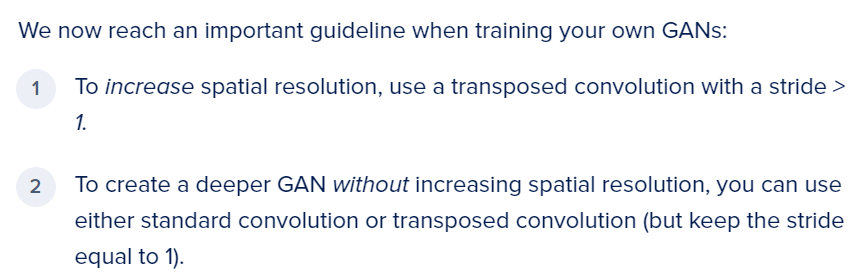

**DISCRIMINATOR**

In [21]:
@staticmethod
def build_discriminator(width, height, depth, alpha=0.2):
		# initialize the model along with the input shape to be
		# "channels last"
		model = Sequential()
		inputShape = (height, width, depth)
		# first set of CONV => RELU layers
		model.add(Conv2D(32, (5, 5), padding="same", strides=(2, 2),
			input_shape=inputShape))
		model.add(LeakyReLU(alpha=alpha))
		# second set of CONV => RELU layers
		model.add(Conv2D(64, (5, 5), padding="same", strides=(2, 2)))
		model.add(LeakyReLU(alpha=alpha))
		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(512))
		model.add(LeakyReLU(alpha=alpha))
		# sigmoid layer outputting a single value
		model.add(Dense(1))
		model.add(Activation("sigmoid"))
		# return the discriminator model
		return model

**Implementing our GAN training script**

In [23]:
# import the necessary packages
#from pyimagesearch.dcgan import DCGAN
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from sklearn.utils import shuffle
from imutils import build_montages
import numpy as np
import argparse
import cv2
import os

In [28]:
# load the Fashion MNIST dataset and stack the training and testing
# data points so we have additional training data
print("[INFO] loading MNIST dataset...")
((trainX, _), (testX, _)) = fashion_mnist.load_data()
trainImages = np.concatenate([trainX, testX])
# add in an extra dimension for the channel and scale the images
# into the range [-1, 1] (which is the range of the tanh
# function)
trainImages = np.expand_dims(trainImages, axis=-1)
trainImages = (trainImages.astype("float") - 127.5) / 127.5


[INFO] loading MNIST dataset...
4422102/4422102 [==============================] - 0s 0us/step


[INFO] building generator...
[INFO] building discriminator...


AttributeError: ignored